Importing the Dependencies

In [149]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data Collection and Processing

In [150]:
# loading the dataset to pandas DataFrame
loan_dataset = pd.read_csv(r'C:\Users\mxj210016\Desktop\Python_Learning\Projects\Project5_\dataset.csv')

In [151]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [152]:
# printing the first 5 rows of the dataframe
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [153]:
# number of rows and columns
loan_dataset.shape

(614, 13)

In [154]:
# statistical measures
loan_dataset.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001811,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [155]:
# number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [156]:
# dropping the missing values
loan_dataset = loan_dataset.dropna()

In [157]:
# number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [158]:
# label encoding
#loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)
# label encoding
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()


In [159]:
# printing the first 5 rows of the dataframe
loan_dataset.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
10,LP001024,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,Y


### Encoding

In [160]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
cat_col=loan_dataset.select_dtypes(include=['object']).columns.delete([0,-1])
print(cat_col)


Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')


In [161]:
enc_datset=pd.get_dummies(loan_dataset, columns = cat_col)
enc_datset['Loan_Status']=LE.fit_transform(enc_datset['Loan_Status'])
#loan_dataset=enc_datset
enc_datset

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,LP001003,4583,1508.0,128.0,360.0,1.0,0,0,1,0,...,1,0,0,1,0,1,0,1,0,0
2,LP001005,3000,0.0,66.0,360.0,1.0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1
3,LP001006,2583,2358.0,120.0,360.0,1.0,1,0,1,0,...,0,0,0,0,1,1,0,0,0,1
4,LP001008,6000,0.0,141.0,360.0,1.0,1,0,1,1,...,0,0,0,1,0,1,0,0,0,1
5,LP001011,5417,4196.0,267.0,360.0,1.0,1,0,1,0,...,0,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,2900,0.0,71.0,360.0,1.0,1,1,0,1,...,0,0,0,1,0,1,0,1,0,0
610,LP002979,4106,0.0,40.0,180.0,1.0,1,0,1,0,...,0,0,1,1,0,1,0,1,0,0
611,LP002983,8072,240.0,253.0,360.0,1.0,1,0,1,0,...,1,0,0,1,0,1,0,0,0,1
612,LP002984,7583,0.0,187.0,360.0,1.0,1,0,1,0,...,0,1,0,1,0,1,0,0,0,1


In [162]:
loan_dataset.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [163]:
# Dependent column values
loan_dataset['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [164]:
# replacing the value of 3+ to 4
loan_dataset = loan_dataset.replace(to_replace='3+', value=4)

In [165]:
# dependent values
loan_dataset['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

Data Visualization

<AxesSubplot:xlabel='Education', ylabel='count'>

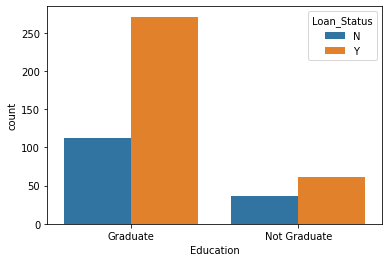

In [166]:
# education & Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

<AxesSubplot:xlabel='Married', ylabel='Count'>

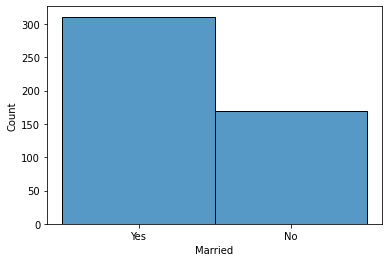

In [167]:
sns.histplot(x='Married',data=loan_dataset)

<AxesSubplot:xlabel='Married', ylabel='count'>

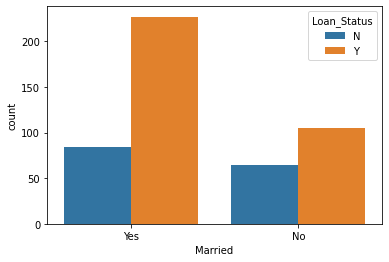

In [168]:
# marital status & Loan Status
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)

In [169]:
# convert categorical columns to numerical values
# loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
#                       'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [170]:
loan_dataset.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [171]:
#loan_dataset['Loan_Status']= LE.fit_transform(loan_dataset['Loan_Status'])
loan_dataset_cat=loan_dataset.loc[:,loan_dataset.dtypes==np.object]
print(loan_dataset_cat.columns)
for i, col in enumerate(loan_dataset_cat.columns)  :
#     print(loan_dataset.dtypes)
    #if loan_dataset.dtypes== 'object':
        print(col)
        loan_dataset[col]= LE.fit_transform(loan_dataset[col].astype(str))

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')
Loan_ID
Gender
Married
Dependents
Education
Self_Employed
Property_Area
Loan_Status


In [172]:
loan_dataset.dtypes

Loan_ID                int32
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [173]:
loan_dataset.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,4,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
6,5,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1
7,6,1,1,3,0,0,3036,2504.0,158.0,360.0,0.0,1,0
8,7,1,1,2,0,0,4006,1526.0,168.0,360.0,1.0,2,1
9,8,1,1,1,0,0,12841,10968.0,349.0,360.0,1.0,1,0
10,9,1,1,2,0,0,3200,700.0,70.0,360.0,1.0,2,1


In [174]:
# separating the data and label
X = loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = loan_dataset['Loan_Status']

In [175]:
print(X)
print(Y)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1           1          0              0             4583   
2         1        1           0          0              1             3000   
3         1        1           0          1              0             2583   
4         1        0           0          0              0             6000   
5         1        1           2          0              1             5417   
..      ...      ...         ...        ...            ...              ...   
609       0        0           0          0              0             2900   
610       1        1           3          0              0             4106   
611       1        1           1          0              0             8072   
612       1        1           2          0              0             7583   
613       0        0           0          0              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

Train Test Split

In [176]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [177]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


Training the model:

Support Vector Machine Model

In [178]:
classifier = svm.SVC(kernel='linear')

In [179]:
#training the support Vector Macine model
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

Model Evaluation

In [180]:
# accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)

In [181]:
print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  0.8055555555555556


In [182]:
# accuracy score on training data
X_test_prediction = classifier.predict(X_test)
test_data_accuray = accuracy_score(X_test_prediction,Y_test)

In [183]:
print('Accuracy on test data : ', test_data_accuray)

Accuracy on test data :  0.8333333333333334


Making a predictive system

In [184]:
Xar=np.array(X)
Xar[0,:]

array([1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 4.583e+03,
       1.508e+03, 1.280e+02, 3.600e+02, 1.000e+00, 0.000e+00])

In [185]:
row=100
X_new=Xar[row,:]
y_pred=classifier.predict(X_new.reshape(1,-1))
if y_pred==1:
    print("loan_status=Yes")
else:
    print("loan_status=No")
    
if np.array(Y)[row]==1: 
    print('true status:Yes')
else: 
        print ('true status:No')    


loan_status=Yes
true status:No


In [186]:
y_train=Y_train
y_test=Y_test

In [187]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Classifiers--------------------------------------------------
clf_LR = LogisticRegression(max_iter=10000).fit(X_train, y_train)
clf_RF = RandomForestClassifier().fit(X_train, y_train)
clf_SVM = SVC().fit(X_train, y_train)
clf_SGD = SGDClassifier().fit(X_train, y_train)
clf_NB = GaussianNB().fit(X_train, y_train)
clf_KNN = KNeighborsClassifier().fit(X_train, y_train)
clf_NN=MLPClassifier(solver='adam', alpha=1e-2,hidden_layer_sizes=(4, 2), max_iter=5000, random_state=0).fit(X_train, y_train)
clf_Ens= EnsembleVoteClassifier(clfs=[clf_LR, clf_RF, clf_SVM, clf_SGD], weights=[1, 1, 1], voting='soft')

class_model={
            'Logistic Regression':clf_LR,
            'Random Forest':clf_RF,
            'SVM':clf_SVM,
            "SGD":clf_SGD,
            'Naive Bayes':clf_NB,
            'KNN':clf_KNN,
            'NN':clf_NN
#             'Ens':clf_Ens
            }

class_score={}

#Model selection comparision--------------------------------------------
for name,model in class_model.items():

    score_test=model.score(X_test, y_test)
    score_train=model.score(X_train, y_train)
    score_cv= cross_val_score(model, X_train, y_train, cv=10, scoring='f1_macro').mean()
    class_score[name]=[score_train, score_cv, score_test]
    
    print("Train: %0.3f" % (float(score_train.round(3))), "CV: %0.3f" % (float(score_cv.round(3))), 
          'Test: %0.3f [%s]' % (float(score_test.round(3)), name))
    

Train: 0.806 CV: 0.709 Test: 0.833 [Logistic Regression]
Train: 1.000 CV: 0.720 Test: 0.833 [Random Forest]
Train: 0.829 CV: 0.710 Test: 0.833 [SVM]
Train: 0.794 CV: 0.645 Test: 0.833 [SGD]
Train: 0.799 CV: 0.694 Test: 0.812 [Naive Bayes]
Train: 0.810 CV: 0.705 Test: 0.792 [KNN]
Train: 0.808 CV: 0.702 Test: 0.833 [NN]
